# HW #1

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import*
import math
import pandas as pd

## Question 1: Random walk

### 50 steps

In [18]:
def random_walk(n):
  x = np.zeros(n) 
  y = np.zeros(n)
  for i in range(n):
    x[i] = x[i-1] + np.random.normal(0,1) 
    y[i] = y[i-1] + np.random.normal(0,1)
  return x,y

def get_loc():
  x_all,y_all = random_walk(n=50)
  point = [x_all[-1], y_all[-1]]
  a = [0, 0, 0, 0]
  if ((point[0]>0) or (point[0]==0))  and point[1]>0: 
    a[0]+=1
  if point[0]<0 and (point[1]>0 or point[1] == 0): 
    a[1]+=1
  if ((point[0]<0) or (point[0]==0)) and point[1]<0: 
    a[2]+=1
  if point[0]>0 and (point[1]< 0 or point[1] == 0): 
    a[3]+=1
  return a


def Trials(n : int = 10000):
  initial = np.array([0,0,0,0], dtype = "float64")
  for _ in range(n):
    finalLocation = get_loc()
    initial += finalLocation
  return initial

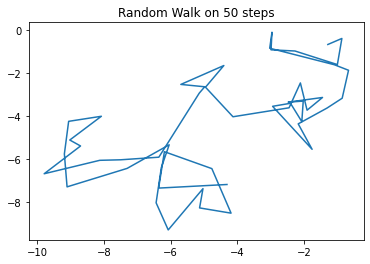

In [19]:
x, y = random_walk(50)
plt.plot(x,y)
plt.title("Random Walk on 50 steps")
plt.show()

#### Report the number that ends in each quadrant

In [20]:
num_counts = Trials()
num_counts

array([2500., 2557., 2446., 2497.])

#### What values would you expect for these proportions? Do the observed proportions vary significantly from the expected values?

I think $p_1 = p_2 = p_3 = p_4 = \frac{1}{4}$.  
I plan to do Chi-square test where:

$H_0: $ $p_1 = p_2 = p_3 = p_4 = \frac{1}{4}$.  

$H_a: $ not all $p_is $ are equal 

Then the test Statistic $\sum_{i=1}^{i=4}\frac{\frac{f_i}{N} - \frac{1}{4} }{1/4}$ follows $\chi^2(3)$

In [23]:
H_0 = np.array([1/4, 1/4, 1/4, 1/4])
chisq, p = chisquare(num_counts/np.sum(num_counts), f_exp=H_0, ddof=0)
print(f"The p-value is {p:4.5f}, so we accept the null hypothesis.")

The p-value is 1.00000, so we accept the null hypothesis.


#### 1b 500 steps

In [24]:
def random_walk(n):
  x = np.zeros(n) 
  y = np.zeros(n)
  for i in range(n):
    x[i] = x[i-1] + np.random.normal(0,1) 
    y[i] = y[i-1] + np.random.normal(0,1)
  return x,y

def get_loc():
  x_all,y_all = random_walk(n=500)
  point = [x_all[-1], y_all[-1]]
  a = [0, 0, 0, 0]
  if ((point[0]>0) or (point[0]==0))  and point[1]>0: 
    a[0]+=1
  if point[0]<0 and (point[1]>0 or point[1] == 0): 
    a[1]+=1
  if ((point[0]<0) or (point[0]==0)) and point[1]<0: 
    a[2]+=1
  if point[0]>0 and (point[1]< 0 or point[1] == 0): 
    a[3]+=1
  return a


def Trials(n : int = 10000):
  initial = np.array([0,0,0,0], dtype = "float64")
  for _ in range(n):
    finalLocation = get_loc()
    initial += finalLocation
  return initial

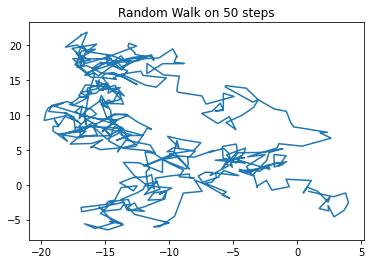

In [27]:
x, y = random_walk(500)
plt.plot(x,y)
plt.title("Random Walk on 50 steps")
plt.show()

In [25]:
num_counts = Trials()
num_counts

array([2511., 2423., 2497., 2569.])

In [26]:
H_0 = np.array([1/4, 1/4, 1/4, 1/4])
chisq, p = chisquare(num_counts/np.sum(num_counts), f_exp=H_0, ddof=0)
print(f"The p-value is {p:4.5f}, so we accept the null hypothesis.")

The p-value is 1.00000, so we accept the null hypothesis.


#### 1c repeate 1a, random walk with lattice

In [33]:
def random_walk(n):
  x = np.zeros(n) 
  y = np.zeros(n)
  for i in range(n):
    x[i] = x[i-1] + random.randint(-1,1) 
    y[i] = y[i-1] + random.randint(-1,1)
  return x,y

def get_loc():
  x_all,y_all = random_walk(n=50)
  point = [x_all[-1], y_all[-1]]
  a = [0, 0, 0, 0]
  if ((point[0]>0) or (point[0]==0))  and point[1]>0: 
    a[0]+=1
  if point[0]<0 and (point[1]>0 or point[1] == 0): 
    a[1]+=1
  if ((point[0]<0) or (point[0]==0)) and point[1]<0: 
    a[2]+=1
  if point[0]>0 and (point[1]< 0 or point[1] == 0): 
    a[3]+=1
  return a


def Trials(n : int = 10000):
  initial = np.array([0,0,0,0], dtype = "float64")
  for _ in range(n):
    finalLocation = get_loc()
    initial += finalLocation
  return initial

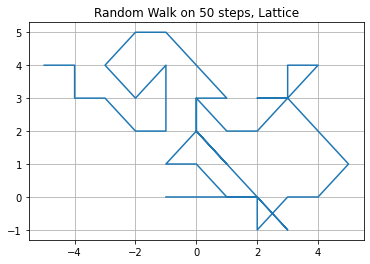

In [34]:
x,y = random_walk(50)
plt.plot(x,y)
plt.title("Random Walk on 50 steps, Lattice")
plt.grid()
plt.show()

In [35]:
num_counts = Trials()
num_counts

array([2527., 2404., 2474., 2559.])

In [40]:
H_0 = np.array([1/4, 1/4, 1/4, 1/4])
chisq, p = chisquare(num_counts/np.sum(num_counts), f_exp=H_0, ddof=0)
print(f"when steps = 50, The p-value is {p:4.5f}, so we accept the null hypothesis.")

when steps = 50, The p-value is 1.00000, so we accept the null hypothesis.


In [37]:
def random_walk(n): 
    x = np.zeros(n) 
  y = np.zeros(n)
  for i in range(n):
    x[i] = x[i-1] + random.randint(-1,1) 
    y[i] = y[i-1] + random.randint(-1,1)
  return x,y

def get_loc():
  x_all,y_all = random_walk(n=500)
  point = [x_all[-1], y_all[-1]]
  a = [0, 0, 0, 0]
  if ((point[0]>0) or (point[0]==0))  and point[1]>0: 
    a[0]+=1
  if point[0]<0 and (point[1]>0 or point[1] == 0): 
    a[1]+=1
  if ((point[0]<0) or (point[0]==0)) and point[1]<0: 
    a[2]+=1
  if point[0]>0 and (point[1]< 0 or point[1] == 0): 
    a[3]+=1
  return a


def Trials(n : int = 10000):
  initial = np.array([0,0,0,0], dtype = "float64")
  for _ in range(n):
    finalLocation = get_loc()
    initial += finalLocation
  return initial

In [38]:
num_counts = Trials()
num_counts

array([2465., 2482., 2522., 2529.])

In [39]:
H_0 = np.array([1/4, 1/4, 1/4, 1/4])
chisq, p = chisquare(num_counts/np.sum(num_counts), f_exp=H_0, ddof=0)
print(f"When steps = 500, The p-value is {p:4.5f}, so we accept the null hypothesis.")

When steps = 500, The p-value is 1.00000, so we accept the null hypothesis.


## Question 2
#### Binomial

In [6]:
E_x = 14*0.9
Var_x = math.sqrt(14*0.9*0.1)
# Var_x = 14*0.9*0.1
print(f" Real SD is {Var_x} and Average is {E_x}")

 Real SD is 1.1224972160321824 and Average is 12.6


In [38]:
s = np.random.binomial(14, 0.9, 10000)
sample_ave = sum(s)/10000
print("Average: ", sample_ave)
sample_sd = np.std(s)
print("SD: ", sample_sd)

Average:  12.6182
SD:  1.1098778130947569


In [45]:
s = np.random.binomial(14, 0.9, 100000)
sample_ave = sum(s)/100000
print("Average: ", sample_ave)
sample_sd = np.std(s)
print("SD: ", sample_sd)

Average:  12.6034
SD:  1.123391490087049


In [46]:
s = np.random.binomial(14, 0.9, 1000000)
sample_ave = sum(s)/1000000
print("Average: ", sample_ave)
sample_sd = np.std(s)
print("SD: ", sample_sd)

Average:  12.601303
SD:  1.1208959372711635


In [48]:
from tabulate import tabulate
data = [["n = 10000", 12.6182, 1.1098], 
 ["n = 100000", 12.6034, 1.1233], 
 ["n = 1000000", 12.6013, 1.12089],
 ["Real", 12.6, 1.1224972]]
col_names = ["N", "Average", "SD", "Real"]
print(tabulate(data, headers=col_names))

N              Average       SD
-----------  ---------  -------
n = 10000      12.6182  1.1098
n = 100000     12.6034  1.1233
n = 1000000    12.6013  1.12089
Real           12.6     1.1225


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


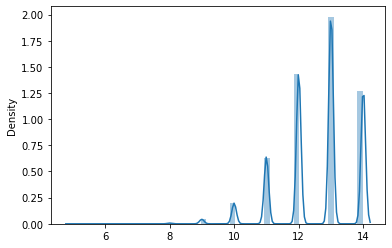

In [49]:
sns.distplot(s)

#### Beta

In [50]:
b = np.random.beta(0.5, 0.5, 10000)
sample_ave = sum(b)/10000
print("Average: ", sample_ave)
sample_sd = np.std(b)
print("SD: ", sample_sd)

Average:  0.5006940837676809
SD:  0.3546848356974192


In [51]:
b = np.random.beta(0.5, 0.5, 100000)
sample_ave = sum(b)/100000
print("Average: ", sample_ave)
sample_sd = np.std(b)
print("SD: ", sample_sd)

Average:  0.49866629516803057
SD:  0.3529353802124357


In [57]:
b = np.random.beta(0.5, 0.5, 1000000)
sample_ave = sum(b)/1000000
print("Average: ", sample_ave)
sample_sd = np.std(b)
print("SD: ", sample_sd)

Average:  0.5006267563336168
SD:  0.35358738422460273


In [56]:
from tabulate import tabulate
data = [["n = 10000", 0.500694, 0.3546], 
 ["n = 100000", 0.49866, 0.3529], 
 ["n = 1000000", 0.4998, 0.353547]]
col_names = ["N", "Average", "SD"]
print(tabulate(data, headers=col_names))

N              Average        SD
-----------  ---------  --------
n = 10000     0.500694  0.3546
n = 100000    0.49866   0.3529
n = 1000000   0.4998    0.353547


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


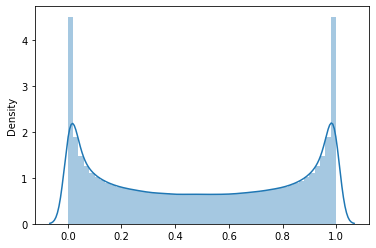

In [58]:
sns.distplot(b)

#### Gamma

In [59]:
g = np.random.gamma(12, 2, 10000)
sample_ave = sum(g)/10000
print("Average: ", sample_ave)
sample_sd = np.std(g)
print("SD: ", sample_sd)

Average:  23.971670108745705
SD:  6.963238388076983


In [60]:
g = np.random.gamma(12, 2, 100000)
sample_ave = sum(g)/100000
print("Average: ", sample_ave)
sample_sd = np.std(g)
print("SD: ", sample_sd)

Average:  24.01543961819074
SD:  6.946670993530743


In [61]:
g = np.random.gamma(12, 2, 1000000)
sample_ave = sum(g)/1000000
print("Average: ", sample_ave)
sample_sd = np.std(g)
print("SD: ", sample_sd)

Average:  24.003297394384287
SD:  6.924285906173426


In [62]:
data = [["n = 10000", 23.9716, 6.963238], 
 ["n = 100000", 24.0154, 6.94667], 
 ["n = 1000000", 24.00329, 6.92428]]
col_names = ["N", "Average", "SD"]
print(tabulate(data, headers=col_names))

N              Average       SD
-----------  ---------  -------
n = 10000      23.9716  6.96324
n = 100000     24.0154  6.94667
n = 1000000    24.0033  6.92428


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


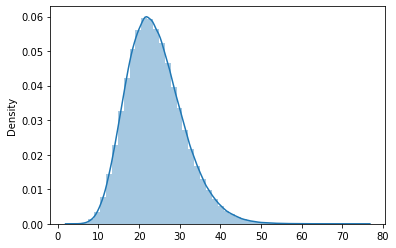

In [63]:
sns.distplot(g)

#### Inverse Gamma

In [64]:
r = invgamma.rvs(12, 2, size=10000)
sample_ave = sum(r)/10000
print("Average: ", sample_ave)
sample_sd = np.std(r)
print("SD: ", sample_sd)

Average:  2.091043919165766
SD:  0.028648763862927883


In [65]:
r = invgamma.rvs(12, 2, size=100000)
sample_ave = sum(r)/100000
print("Average: ", sample_ave)
sample_sd = np.std(r)
print("SD: ", sample_sd)

Average:  2.091068005255602
SD:  0.02869418651361399


In [66]:
r = invgamma.rvs(12, 2, size=1000000)
sample_ave = sum(r)/1000000
print("Average: ", sample_ave)
sample_sd = np.std(r)
print("SD: ", sample_sd)

Average:  2.090869854851996
SD:  0.028759506175935572


In [67]:
from tabulate import tabulate
data = [["n = 10000", 2.09104, 0.0286], 
 ["n = 100000", 2.091068, 0.028694], 
 ["n = 1000000", 2.0908, 0.028759]]
col_names = ["N", "Average", "SD"]
print(tabulate(data, headers=col_names))

N              Average        SD
-----------  ---------  --------
n = 10000      2.09104  0.0286
n = 100000     2.09107  0.028694
n = 1000000    2.0908   0.028759


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


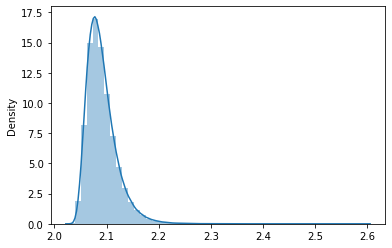

In [68]:
sns.distplot(r)

#### Chisquare on 2df

In [69]:
r = np.random.chisquare(2,10000)
sample_ave = sum(r)/10000
print("Average: ", sample_ave)
sample_sd = np.std(r)
print("SD: ", sample_sd)

Average:  1.9850131608835486
SD:  2.00689022553403


In [70]:
r = np.random.chisquare(2,100000)
sample_ave = sum(r)/100000
print("Average: ", sample_ave)
sample_sd = np.std(r)
print("SD: ", sample_sd)

Average:  1.9839775495087792
SD:  1.9900274364244463


In [71]:
r = np.random.chisquare(2,1000000)
sample_ave = sum(r)/1000000
print("Average: ", sample_ave)
sample_sd = np.std(r)
print("SD: ", sample_sd)

Average:  1.9983571873084802
SD:  2.0008784845929513


In [72]:
data = [["n = 10000", 1.98501, 2.00689], 
 ["n = 100000", 1.983977, 1.9900], 
 ["n = 1000000", 1.99835, 2.000878]]
col_names = ["N", "Average", "SD"]
print(tabulate(data, headers=col_names))

N              Average       SD
-----------  ---------  -------
n = 10000      1.98501  2.00689
n = 100000     1.98398  1.99
n = 1000000    1.99835  2.00088


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


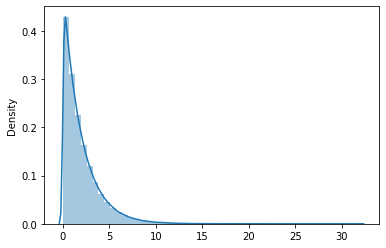

In [73]:
sns.distplot(r)

#### InverseChi-square

In [74]:
r = chi.rvs(12, 2, size=10000)
sample_ave = sum(r)/10000
print("Average: ", sample_ave)
sample_sd = np.std(r)
print("SD: ", sample_sd)

Average:  5.401400341047481
SD:  0.706737376441605


In [75]:
r = chi.rvs(12, 2, size=100000)
sample_ave = sum(r)/100000
print("Average: ", sample_ave)
sample_sd = np.std(r)
print("SD: ", sample_sd)

Average:  5.391422654182529
SD:  0.6997176159085143


In [76]:
r = chi.rvs(12, 2, size=1000000)
sample_ave = sum(r)/1000000
print("Average: ", sample_ave)
sample_sd = np.std(r)
print("SD: ", sample_sd)

Average:  5.391947927960698
SD:  0.6986991579538122


In [77]:
data = [["n = 10000", 5.40140, 0.70673], 
 ["n = 100000", 5.39142, 0.69971], 
 ["n = 1000000", 5.39194, 0.69869]]
col_names = ["N", "Average", "SD"]
print(tabulate(data, headers=col_names))

N              Average       SD
-----------  ---------  -------
n = 10000      5.4014   0.70673
n = 100000     5.39142  0.69971
n = 1000000    5.39194  0.69869


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


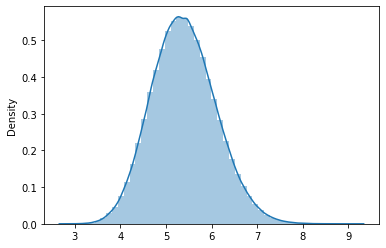

In [78]:
sns.distplot(r)

## Question 3
#### a and b
#### 3a. Draw a sample of size 10000 from the trivariate normal distribution with mean (0,0,0) and variance-covariance matrxi: $$\begin{bmatrix} 1 & 4.5 & 9.0 \\ 4.5 & 25 & 49 \\ 9 & 49 & 100 \end{bmatrix}$$


In [3]:
mean = [0, 0, 0]
cov = [[1, 4.5, 9], [4.5, 25, 49], [9, 49, 100]]

In [82]:
t = np.random.multivariate_normal(mean, cov, 10000)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


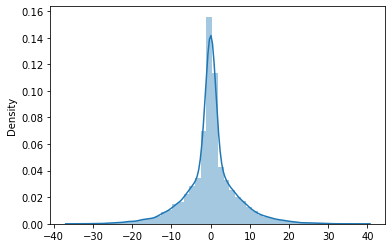

In [83]:
sns.distplot(t)

In [84]:
sample_ave = sum(t)/10000
print("Average: ", sample_ave)
sample_sd = np.std(t)
print("SD: ", sample_sd)

Average:  [0.01310477 0.0662522  0.13813914]
SD:  6.499224294697967


#### 3c.  Draw a sample of size 10,000 from the conditional distribution p($X_1$|$X_2,\; X_3$ ), take $X_2 = X_3 = 1$. Compute the sample mean and sample SD and compare these numbers to the true values. Draw a histogram of the simulated values, along with the true conditional distribution. 

The covaraince martix can be written as :  
$\begin{bmatrix}
\sigma^2_{X_1} & \rho_{X_1,X_2}\sigma_1 \sigma_2 & \rho_{X_1,X_3}\sigma_1 \sigma_3 \\ 
\rho_{X_1,X_2}\sigma_1 \sigma_2  & \sigma^2_{X_2} & \rho_{X_2,X_3}\sigma_2 \sigma_3 \\ 
\rho_{X_1,X_3}\sigma_1 \sigma_3 & \rho_{X_2,X3}\sigma_2 \sigma_3 & \sigma^2_{X_3} 
\end{bmatrix}$

Then

E[$X_1$|$X_2 =x_2, X_3 = x_3$] = $\mu_1$ + $\frac{\sigma_1(\sigma_3(x_2 - \mu_2)(\rho_{23}\rho_{13} - \rho_{12}) - \sigma_2(x_3 - \mu_3)(\rho_{13} - \rho_{23}\rho_{12})}{(\rho_{23}^2 - 1)\sigma_2 \sigma_3}$

Var($X_1$|$X_2 =x_2, X_3 = x_3$) = $\frac{\sigma_1^2(\rho_{23}^2 - 2\rho_{23}\rho_{13}\rho_{12} + \rho_{13}^2 + \rho_{12}^2 - 1)}{\rho_{23}^2 -1}$  
Hence, E[$X_1$|$X_2 =1, X_3 = 1$] = 0.1363636363636362  
Var($X_1$|$X_2 = 1, X_3 = 1$) = 0.18181818181818385 

So SD of it = 0.4263

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


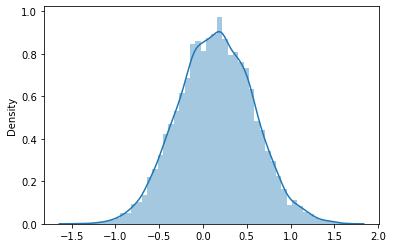

In [42]:
t2 = np.random.normal(0.1364, np.sqrt(0.1818), 10000)
sns.distplot(t2)

#### 3d. Use the sample from trivariate joint distribution to obtain the conditional mean and SD of $X_1$ given $X_2 = 1, X_3 = 1$. i.e Look at all the tripes whose second and third components are within an $\epsilon$ of .5, .05, .005. Then do a compare.

In [81]:
pool_1 = np.array([])
pool_2 = np.array([])
pool_3 = np.array([])
while(len(pool_3)<int(400)):
    X = np.random.multivariate_normal(mean, cov, size = 100000, check_valid='warn')

    afterX2_1 = X[np.abs(X[:,1]-1)<.5]
    afterX3_1 = afterX2_1[np.abs(afterX2_1[:,2]-1)<.5]
    X1_1 = afterX3_1[:,0]
    pool_1 = np.append(pool_1, X1_1)
    pool_1 = pool_1.flatten()

    afterX2_2 = X[np.abs(X[:,1]-1)<.05]
    afterX3_2 = afterX2_2[np.abs(afterX2_2[:,2]-1)<.05]
    X1_2 = afterX3_2[:,0]
    pool_2 = np.append(pool_2, X1_2)
    pool_2 = pool_2.flatten()

    afterX2_3 = X[np.abs(X[:,1]-1)<.005]
    afterX3_3 = afterX2_3[np.abs(afterX2_3[:,2]-1)<.005]
    X1_3 = afterX3_3[:,0]
    pool_3 = np.append(pool_3, X1_3)
    pool_3 = pool_3.flatten()

In [82]:
pool_4 = np.append(pool_4, pool_3)
len(pool_4)

4200

In [83]:
pool_5 = np.append(pool_5, pool_2)

In [84]:
pool_3 = pool_4
pool_2 = pool_5

In [101]:
l_1_1 = np.random.choice(pool_1,1000,replace = True)
l_2_1 = np.random.choice(pool_2,1000,replace = True)
l_3_1 = np.random.choice(pool_3,1000,replace = True)

l_1_2 = np.random.choice(pool_1,10000,replace = True)
l_2_2 = np.random.choice(pool_2,10000,replace = True)
l_3_2 = np.random.choice(pool_3,10000,replace = True)

l_1_3 = np.random.choice(pool_1,100000,replace = True)
l_2_3 = np.random.choice(pool_2,100000,replace = True)
l_3_3 = np.random.choice(pool_3,100000,replace = True)

In [102]:
SDTable = pd.DataFrame({"0.5": [np.std(l_1_1), np.std(l_2_1), np.std(l_3_1)], 
                       "0.05": [np.std(l_1_2), np.std(l_2_2), np.std(l_3_2)],
                       "0.005": [np.std(l_1_3), np.std(l_2_3), np.std(l_3_3)]})
MEANTable = pd.DataFrame({"0.5": [np.mean(l_1_1), np.mean(l_2_1), np.mean(l_3_1)], 
                       "0.05": [np.mean(l_1_2), np.mean(l_2_2), np.mean(l_3_2)],
                       "0.005": [np.mean(l_1_3), np.mean(l_2_3), np.mean(l_3_3)]})
SDTable.index = pd.Series(["1e3","1e4", "1e5"])
MEANTable.index = pd.Series(["1e3","1e4", "1e5"])

In [103]:
SDTable

,0.5,0.05,0.005
1e3,0.433921,0.426558,0.428093
1e4,0.420368,0.428127,0.427038
1e5,0.453042,0.425051,0.424429


In [104]:
MEANTable

,0.5,0.05,0.005
1e3,0.137891,0.143691,0.134095
1e4,0.147307,0.140875,0.135876
1e5,0.143150,0.136056,0.137426
